In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titaniccsv/titanic.csv
/kaggle/input/titaniccsv/test.csv


In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
train_df = pd.read_csv('/kaggle/input/titaniccsv/titanic.csv')
test_df = pd.read_csv('/kaggle/input/titaniccsv/test.csv')
combine = [train_df, test_df]

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [12]:
#dropping passenger ID
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['PassengerId'], axis=1)
test_df = test_df.drop(['PassengerId'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 10) (418, 9) (891, 10) (418, 9)


('After', (891, 9), (418, 8), (891, 9), (418, 8))

In [13]:
#Dropping name
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 8), (418, 7))

In [14]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [17]:
mean1=train_df['Age'].mean()
mean2=test_df['Age'].mean()
mean=(mean1+mean2)/2
print(mean,mean1,mean2)

29.985854004252303 29.69911764705882 30.272590361445783


In [18]:
train_df['Age'].fillna(mean,inplace=True)


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [20]:
test_df['Age'].fillna(mean,inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 23.0+ KB


In [21]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [22]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 20)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 4.399]",0.675000
1,"(4.399, 8.378]",0.642857
2,"(8.378, 12.357]",0.266667
3,"(12.357, 16.336]",0.483871
4,"(16.336, 20.315]",0.341772
5,"(20.315, 24.294]",0.367347
6,"(24.294, 28.273]",0.352941
7,"(28.273, 32.252]",0.333333
8,"(32.252, 36.231]",0.479452
9,"(36.231, 40.21]",0.377778


In [23]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 4.399, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 4.399) & (dataset['Age'] <= 8.378), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 8.378) & (dataset['Age'] <= 12.357), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 12.357) & (dataset['Age'] <= 16.336), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 16.336) & (dataset['Age'] <= 20.315), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 20.315) & (dataset['Age'] <= 24.294), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 24.294) & (dataset['Age'] <= 28.273), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 28.273) & (dataset['Age'] <= 32.252), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 32.252) & (dataset['Age'] <= 36.231), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 36.231) & (dataset['Age'] <= 40.21), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 40.21) & (dataset['Age'] <= 44.189), 'Age'] = 10
    dataset.loc[(dataset['Age'] > 44.189) & (dataset['Age'] <= 52.147), 'Age'] = 11
    dataset.loc[(dataset['Age'] > 52.147) & (dataset['Age'] <= 56.126), 'Age'] = 12
    dataset.loc[(dataset['Age'] > 56.126) & (dataset['Age'] <= 60.105), 'Age'] = 13
    dataset.loc[(dataset['Age'] > 60.105) & (dataset['Age'] <= 64.084), 'Age'] = 14
    dataset.loc[(dataset['Age'] > 64.084) & (dataset['Age'] <= 68.063), 'Age'] = 15
    dataset.loc[(dataset['Age'] > 68.063) & (dataset['Age'] <= 72.042), 'Age'] = 16
    dataset.loc[(dataset['Age'] > 72.042) & (dataset['Age'] <= 76.021), 'Age'] = 17
    dataset.loc[(dataset['Age'] > 76.021) & (dataset['Age'] <= 80.0), 'Age'] = 18
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeBand
0,0,3,0,5.0,1,0,7.2500,S,"(20.315, 24.294]"
1,1,1,1,9.0,1,0,71.2833,C,"(36.231, 40.21]"
2,1,3,1,6.0,0,0,7.9250,S,"(24.294, 28.273]"
3,1,1,1,8.0,1,0,53.1000,S,"(32.252, 36.231]"
4,0,3,0,8.0,0,0,8.0500,S,"(32.252, 36.231]"


In [24]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,5.0,1,0,7.2500,S
1,1,1,1,9.0,1,0,71.2833,C
2,1,3,1,6.0,0,0,7.9250,S
3,1,1,1,8.0,1,0,53.1000,S
4,0,3,0,8.0,0,0,8.0500,S


In [25]:
train_df[['SibSp','Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [26]:
train_df[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [27]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,5.0,1,0,7.2500,S
1,1,1,1,9.0,1,0,71.2833,C
2,1,3,1,6.0,0,0,7.9250,S
3,1,1,1,8.0,1,0,53.1000,S
4,0,3,0,8.0,0,0,8.0500,S


In [28]:
train_df[['Age','Survived']].groupby(['Age']).mean().sort_values(by='Survived', ascending=False)

,Survived
Age,
18.0,1.000000
0.0,0.675000
1.0,0.642857
3.0,0.483871
8.0,0.479452
12.0,0.437500
11.0,0.406250
13.0,0.384615
9.0,0.377778


In [29]:
train_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,6.748597,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,3.062584,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,7.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,8.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,18.000000,8.000000,6.000000,512.329200


In [30]:
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [31]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [32]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,5.0,1,0,7.2500,0
1,1,1,1,9.0,1,0,71.2833,1
2,1,3,1,6.0,0,0,7.9250,0
3,1,1,1,8.0,1,0,53.1000,0
4,0,3,0,8.0,0,0,8.0500,0


In [34]:
train_df.head()
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,8.0,0,0,7.8292,2
1,3,1,11.0,1,0,7.0000,0
2,2,0,14.0,0,0,9.6875,2
3,3,0,6.0,0,0,8.6625,0
4,3,1,5.0,1,1,12.2875,0


In [35]:
test_df['Fare'].fillna(test_df['Fare'].dropna().mean(), inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,8.0,0,0,7.8292,2
1,3,1,11.0,1,0,7.0000,0
2,2,0,14.0,0,0,9.6875,2
3,3,0,6.0,0,0,8.6625,0
4,3,1,5.0,1,1,12.2875,0


In [36]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [37]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,5.0,1,0,0,0
1,1,1,1,9.0,1,0,3,1
2,1,3,1,6.0,0,0,1,0
3,1,1,1,8.0,1,0,3,0
4,0,3,0,8.0,0,0,1,0
5,0,3,0,7.0,0,0,1,2
6,0,1,0,12.0,0,0,3,0
7,0,3,0,0.0,3,1,2,0
8,1,3,1,6.0,0,2,1,0
9,1,2,1,3.0,1,0,2,1


In [38]:
test_df.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,8.0,0,0,0,2
1,3,1,11.0,1,0,0,0
2,2,0,14.0,0,0,1,2
3,3,0,6.0,0,0,1,0
4,3,1,5.0,1,1,1,0
5,3,0,3.0,0,0,1,0
6,3,1,7.0,0,0,0,2
7,2,0,6.0,1,1,2,0
8,3,1,4.0,0,0,0,1
9,3,0,5.0,2,0,2,0


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
import graphviz

X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 7), (712,), (179, 7), (179,))

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 6}


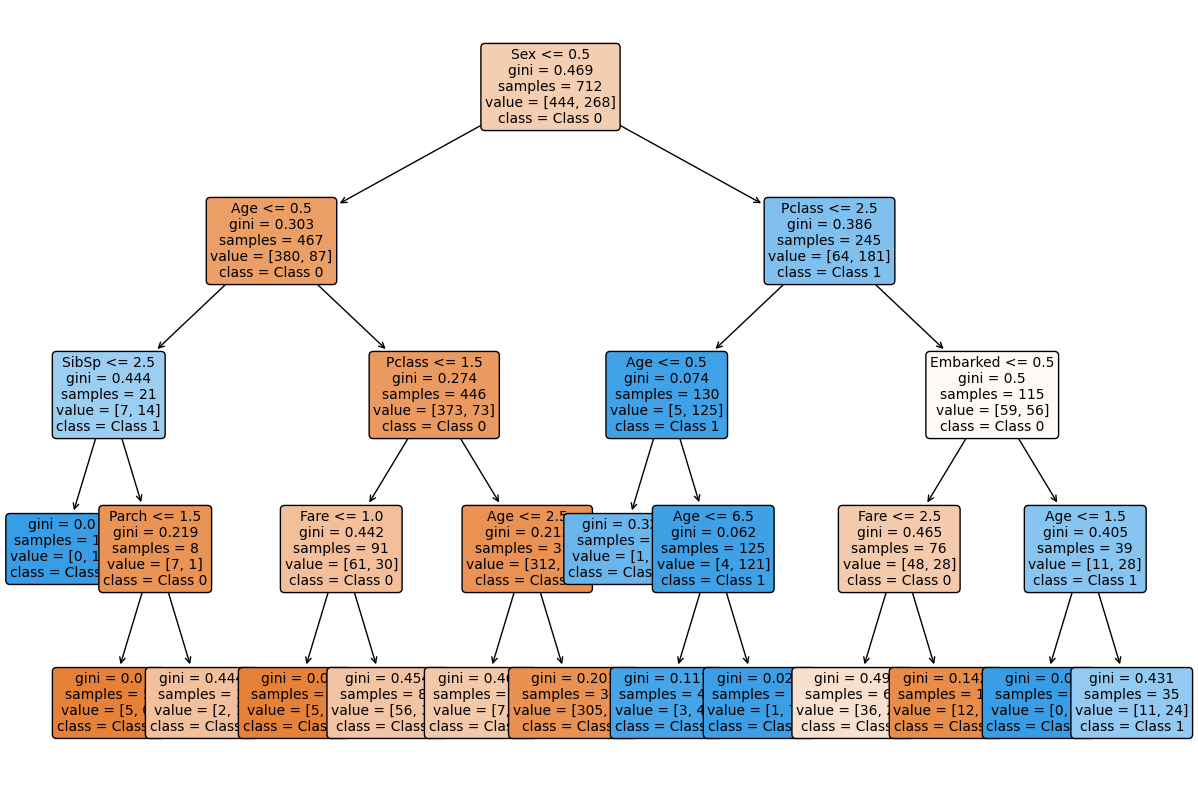

In [40]:
decision_tree = DecisionTreeClassifier(max_features=9)

param_grid={
    'criterion': ['gini','entropy'],
    'max_depth': [4,5,6,7,8,9,10,11,12],
    'min_samples_split': [2,3,4,5,6,7,8,9]
}
grid_search=GridSearchCV(decision_tree,param_grid,cv=5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_dt_classifier = grid_search.best_estimator_

# Plot the Decision Tree
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True, rounded=True, fontsize=10)
plt.show()

In [41]:
acc_decision_tree = round(best_dt_classifier.score(X_test, y_test) * 100, 2)
acc_decision_tree

79.89

In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_dt_classifier,X,y,cv=5,scoring='accuracy')
average_accuracy=cv_scores.mean()

print(f"Average classification accuracy of decision tree: {average_accuracy:.4f}")

Average classification accuracy of decision tree: 0.8048


In [43]:
rf_classifier = RandomForestClassifier(random_state=42)

In [44]:
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10]
}
grid_search=GridSearchCV(rf_classifier,param_grid,cv=5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_classifier = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [45]:
acc_rf_classifier = round(best_rf_classifier.score(X_test, y_test) * 100, 2)
acc_rf_classifier

83.8

In [46]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_classifier,X,y,cv=5,scoring='accuracy')
average_accuracy=cv_scores.mean()

print(f"Average classification accuracy of random forest classifier: {average_accuracy:.4f}")

Average classification accuracy of random forest classifier: 0.8238
